In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import os,sys,fnmatch,time
import numpy as np
import numpy.ma as ma
import cmocean.cm as cm
import scipy.io as sio
sys.path.append('/home/mdunphy/analysis-michael/bathymetry')
from bathy_readers import *

cascadiafile = '/home/mdunphy/MEOPAR/Bathy/Cascadia/cascadia.bil'
xc,yc,zc,pc = getcascadia(cascadiafile)

bc3file = '/home/mdunphy/MEOPAR/Bathy/BC3/british_columbia_3sec.asc'
lonb,latb,zb,pb = getbc3(bc3file)

In [2]:
# Convert to lon,lat + masked array
zcm = ma.masked_array(zc, mask=zc==0)
[XC,YC]=np.meshgrid(xc,yc)
lonc,latc = pc(XC,YC,inverse=True)
zbm = ma.masked_array(zb, mask=zb==0)

In [3]:
def myp(x,y,z):
    cmap = plt.get_cmap(cm.deep)
    cmap.set_bad('burlywood')
    im=plt.pcolormesh(x,y,z,cmap=cmap); cbmax=4000
    cb=plt.colorbar(im); im.set_clim([0,cbmax]); cb.set_clim(0,cbmax);
    plt.tight_layout(pad=0.5);
    plt.grid(True)

<IPython.core.display.Javascript object>


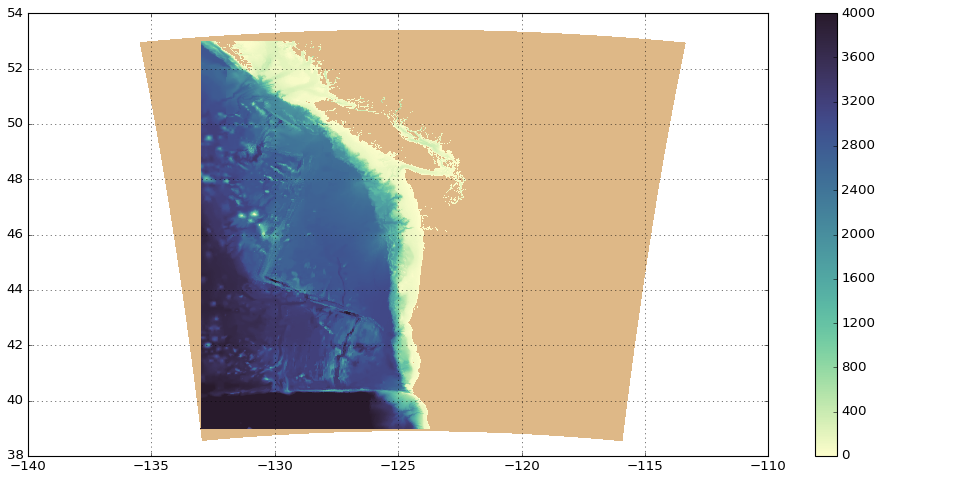

In [4]:
plt.figure(figsize=(12,6)); plt.clf();
myp(lonc,latc,zcm)

<IPython.core.display.Javascript object>


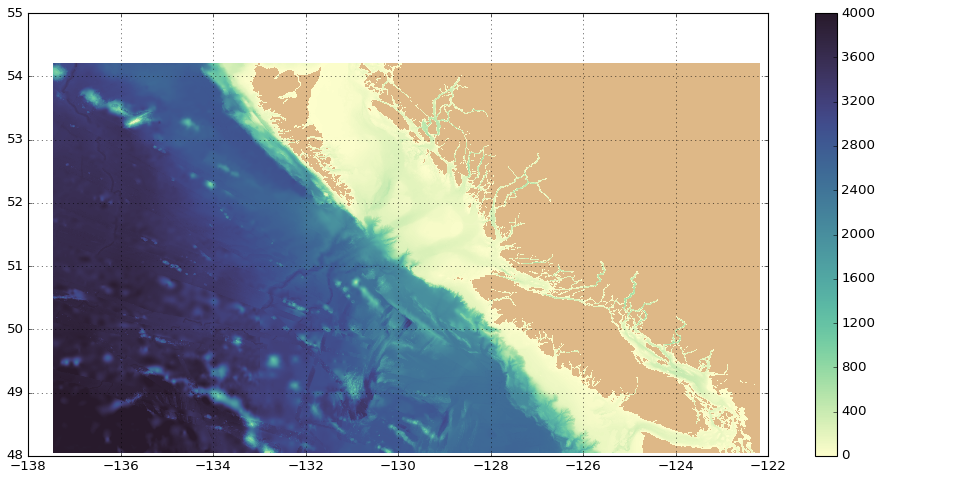

In [5]:
plt.figure(figsize=(12,6)); plt.clf();
myp(lonb,latb,zbm)

In [6]:
# Coastlines
mfile = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')
ncst = mfile['ncst']

In [7]:
# Bounding box for Cascadia
x0,x1=-133,-116
y0,y1 = 39,53
casx=[x0,x0,x1,x1,x0]
casy=[y0,y1,y1,y0,y0]

In [8]:
# Bounding box for BC3
x0,x1=-137.45,-122.2
y0,y1 = 48.05,54.20
bc3x=[x0,x0,x1,x1,x0]
bc3y=[y0,y1,y1,y0,y0]

In [9]:
# Find the bounding box for LAM WEST
lamwest = '/home/mdunphy/MEOPAR/WCVI/lamwestpoints'
a = np.loadtxt(lamwest)
jl,il,yl,xl = a[:,0],a[:,1],a[:,2],a[:,3]
NXl,NYl=int(np.max(jl)),int(np.max(il))
XL=np.reshape(xl,[NYl,NXl])
YL=np.reshape(yl,[NYl,NXl])
x0,y0=XL[:,0],YL[:,0]
x1,y1=XL[-1,:],YL[-1,:]
x2,y2=XL[:,-1],YL[:,-1]
x3,y3=XL[0,:],YL[0,:]
lamx=list(x0)+list(x1)+list(x2[::-1])+list(x3[::-1])
lamy=list(y0)+list(y1)+list(y2[::-1])+list(y3[::-1])

<IPython.core.display.Javascript object>


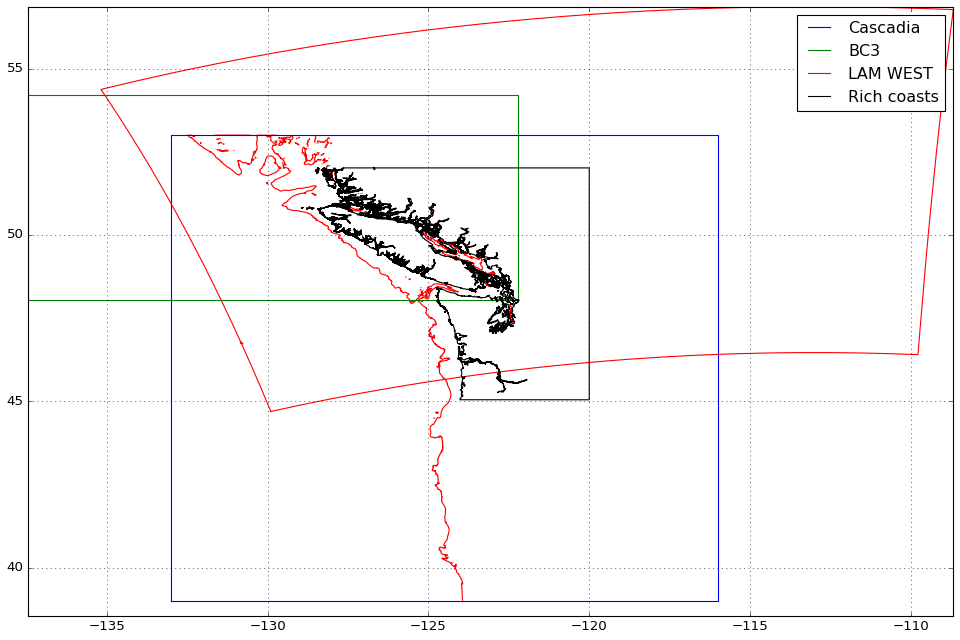

In [10]:
plt.figure(figsize=(12,8));plt.clf();plt.grid(True)
plt.plot(casx,casy,bc3x,bc3y,lamx,lamy)
plt.plot(ncst[:,0],ncst[:,1],'k')
cs200 = plt.contour(lonc,latc,zcm, [200], colors='r')
plt.legend(['Cascadia','BC3','LAM WEST','Rich coasts','Cascadia 200m'])
plt.tight_layout(pad=0.5);

In [11]:
x200,y200=np.array([]),np.array([])
segs=cs200.allsegs[0]
for seg in segs:
    x=np.append(np.nan,seg[:,0])
    y=np.append(np.nan,seg[:,1])
    x200=np.append(x200,x)
    y200=np.append(y200,y)

In [12]:
mfile = sio.loadmat('/home/mdunphy/seagrid/PNW-ll.mat')
lons = mfile['lon']
lats = mfile['lat']
lonm = np.append(lons,x200)
latm = np.append(lats,y200)
sio.savemat('/home/mdunphy/seagrid/Coasts_and_200m_contour.mat', {'lon': lonm, 'lat': latm})